## United Nations Refugee Speeches from High Commissioners

***Francisca Dias***

## Table of Contents

* [Introduction](#Introduction)


* [Libraries](#Libraries)


* [High commissioner speeches](#Highcommissionerspeeches)


* [Speeches each year](#Speecheseachyear)


* [Function to clean content](#Functiontocleancontent)


* [Lengthiest speech](#Lengthiestspeech)

## <a id='introduction'>Introduction</a>

This dataset comes from unhcr.org website, but taken from Kaggle.com.

It includes all speeches made by the High Commissioner up until June 2014.

There are 10 High commissioners represented in this dataset.

Can you guess how had the lengthiest speech?

## <a id='Libraries'>Libraries</a>

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

In [2]:
df = pd.read_csv("/Users/FranciscaDias/Desktop/Kaggle_Competions/1.UN_Refugee_Speeches/speeches.csv",encoding="UTF-8")
df["content"].head()

0      \n\nForced Displacement and the Promise of P...
1      \n\nOpening remarks by António Guterres, Uni...
2      \n\nRemarks to the United Nations Security C...
3      \n\nRemarks to the International Support Gro...
4      \n\nRemarks by António Guterres, United Nati...
Name: content, dtype: object

## <a id='Highcommissionerspeeches'>High commissioner speeches</a>

In [3]:
df.author.unique()

array(['guterres', 'lubbers', 'ogata', 'stoltenberg', 'hocké', 'hartling',
       'khan', 'schnyder', 'lindt', 'Goedhart'], dtype=object)

In [4]:
df.groupby(['author']).size()

author
Goedhart        26
guterres       115
hartling        54
hocké           20
khan            67
lindt           24
lubbers         73
ogata          269
schnyder        41
stoltenberg     14
dtype: int64

## <a id='Speecheseachyear'>Speeches each year</a>

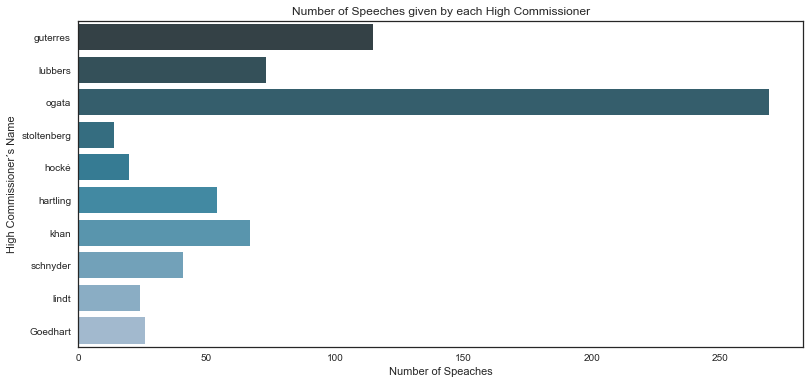

In [5]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(13,6))
ax= sns.countplot(y="author",data=df, palette="PuBuGn_d")
ax.set(xlabel='Number of Speaches', ylabel='High Commissioner´s Name')
plt.title("Number of Speeches given by each High Commissioner");

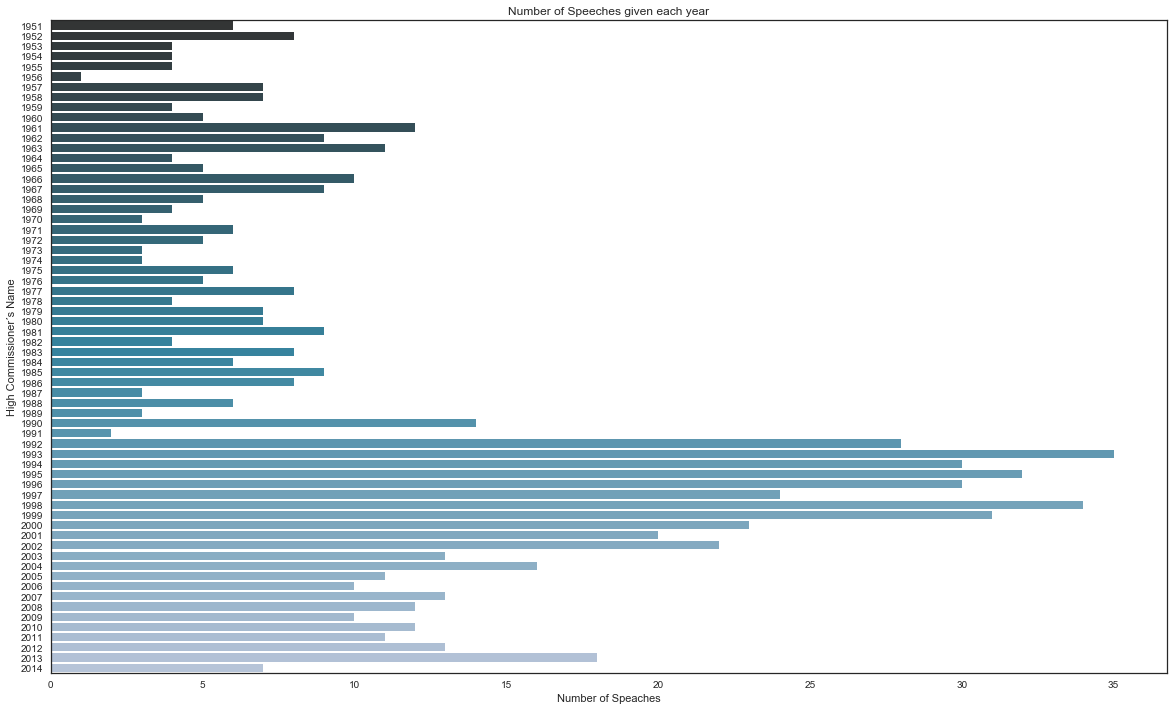

In [6]:
df["date"] = df['by'].str[-4:]

number_speechs_year = df.groupby(['date']).size()

sns.set_style("white")
fig, ax = plt.subplots(figsize=(13,6))
ax= sns.countplot(y="date",data=df, palette="PuBuGn_d")
ax.set(xlabel='Number of Speaches', ylabel='High Commissioner´s Name')
ax.figure.set_size_inches(20,12)
plt.title("Number of Speeches given each year");

## <a id='Functiontocleancontent'>Function to clean content</a>

In [7]:
import re
def cleaning(s):
    s = str(s)
    s = s.rstrip('\n')
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
df['content'] = [cleaning(s) for s in df['content']]

Tokenization and removal of stop words from the content

In [8]:
# Tokenization segments text into basic units (or tokens ) such as words and punctuation.
df['content'] = df.apply(lambda row: nltk.word_tokenize(row['content']),axis=1)

#  Removes stop words from column "content" and iterates over each row and item.
df['content'] = df['content'].apply(lambda x : [item for item in x if item not in stop])

Guess who was the High commissioner that discourse the **lengthiest speech**?

## <a id='Lengthiestspeech'>Lengthiest speech</a>

In [9]:
df["Total_Words"] = df["content"].apply(lambda x : len(x))
df.loc[df['Total_Words'].idxmax()]

author                                                      khan
by                Statements by High Commissioner, 6 August 1976
date                                                        1976
id                                                     3ae68fc04
title          Lectures by Prince Sadruddin Aga Khan, United ...
content        [n, nlectures, prince, sadruddin, aga, khan, u...
Total_Words                                                11001
Name: 555, dtype: object